In [ ]:
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
import time
import numpy as np
from statsmodels.tools import eval_measures
import math

pd.set_option('display.max_rows', 100)
pd.set_option('max_columns', None)                                                                                                                                                                                                                                

## Read In Data Set

In [ ]:
weather_data = pd.read_csv('finalsproject_dataset.csv')
weather_data = weather_data.drop(columns = ['Unnamed: 0'])
weather_data.columns
weather_data.head(10)

,YEAR,MONTH,DAY,AWND(metres/sec),PRCP(cm),SNOW(cm),SNWD(cm),TMAX(celsius),TMIN(celsius),WDF2(degrees),WDF5(degrees),WSF2(metres/sec),WSF5(metres/sec),DailyDewPointTemperature(celsius),DailyDryBulbTemperature(celsius),DailyPrecipitation(cm)(Hourlymean),DailyRelativeHumidity,DailySeaLevelPressure(inches),DailyStationPressure(inches),DailyVisibility,DailyWetBulbTemperature(celsius),DailyWindSpeed(miles/hr)
0,2011,5,2,2.80,0.00,0.0,0.0,16.65,10.00,150.0,165.0,5.85,8.30,6.471193,12.453704,0.000000,68.027778,30.221574,30.138621,9.993333,9.779693,6.472222
1,2011,5,3,3.60,0.00,0.0,0.0,22.80,11.95,275.0,215.0,7.15,9.80,10.305305,14.671717,0.000000,76.054545,30.069619,29.962545,9.831892,13.343434,8.954955
2,2011,5,4,3.85,1.27,0.0,0.0,17.50,8.05,300.0,305.0,8.05,10.95,9.202509,11.645646,7.717692,85.686486,29.954112,29.865938,7.322043,10.028935,9.274194
3,2011,5,5,5.25,0.00,0.0,0.0,17.75,8.05,290.0,310.0,10.70,14.30,1.293019,12.227096,0.338667,52.884956,29.922075,29.860833,9.634386,7.024482,11.842105
4,2011,5,6,3.80,0.00,0.0,0.0,21.40,10.55,175.0,175.0,8.30,11.40,3.405350,15.102881,0.000000,48.027778,29.926916,29.839661,9.993333,9.416196,9.092593
5,2011,5,7,3.20,0.00,0.0,0.0,21.65,13.05,295.0,305.0,9.15,13.20,6.253823,15.091743,0.830385,59.403670,29.840654,29.758276,9.736881,10.689655,7.688073
6,2011,5,8,2.55,0.00,0.0,0.0,22.75,11.40,190.0,190.0,6.25,8.70,6.254960,14.916926,0.000000,61.205607,29.877963,29.808833,9.535446,10.813492,8.312500
7,2011,5,9,4.15,0.00,0.0,0.0,20.85,12.50,35.0,45.0,9.15,12.10,4.458689,14.658869,0.404928,54.596491,29.913810,29.854667,9.392906,9.990584,13.646552
8,2011,5,10,3.40,0.00,0.0,0.0,23.05,12.25,205.0,190.0,8.25,10.50,5.333333,13.687739,0.000000,61.189655,29.954860,29.892500,8.912500,10.122411,14.591667
9,2011,5,11,3.15,0.00,0.0,0.0,21.15,11.65,40.0,55.0,7.40,10.25,7.668651,13.778779,0.000000,68.576577,30.038704,29.978000,9.583214,11.305556,12.526786


In [ ]:
# see shape of data
weather_data.shape

(3641, 22)

## Split Data into Training and Validation Data Sets

In [ ]:
# split data into training and validation data sets
train_data, val_data = train_test_split(weather_data, train_size = 0.7, random_state = 123)

In [ ]:
print(train_data.shape)
print(val_data.shape)

(2548, 22)
(1093, 22)


## Split Label from X Variables

In [ ]:
# separate label from predictors for training and validation data sets

# we have two labels: DailyDryBulbTemperature(celsius) and DailyPrecipitation(cm)(Hourlymean)
# training data
y1_train = train_data["DailyDryBulbTemperature(celsius)"]
y2_train = train_data["DailyPrecipitation(cm)(Hourlymean)"]
x_train = train_data.drop(columns = ["DailyDryBulbTemperature(celsius)", "DailyPrecipitation(cm)(Hourlymean)"])


# validation data
y1_val = val_data["DailyDryBulbTemperature(celsius)"]
y2_val = val_data["DailyPrecipitation(cm)(Hourlymean)"]
x_val = val_data.drop(columns = ["DailyDryBulbTemperature(celsius)", "DailyPrecipitation(cm)(Hourlymean)"])

weather_data.dtypes

YEAR                                    int64
MONTH                                   int64
DAY                                     int64
AWND(metres/sec)                      float64
PRCP(cm)                              float64
SNOW(cm)                              float64
SNWD(cm)                              float64
TMAX(celsius)                         float64
TMIN(celsius)                         float64
WDF2(degrees)                         float64
WDF5(degrees)                         float64
WSF2(metres/sec)                      float64
WSF5(metres/sec)                      float64
DailyDewPointTemperature(celsius)     float64
DailyDryBulbTemperature(celsius)      float64
DailyPrecipitation(cm)(Hourlymean)    float64
DailyRelativeHumidity                 float64
DailySeaLevelPressure(inches)         float64
DailyStationPressure(inches)          float64
DailyVisibility                       float64
DailyWetBulbTemperature(celsius)      float64
DailyWindSpeed(miles/hr)          

## Exlore the Data to Check for Skewness

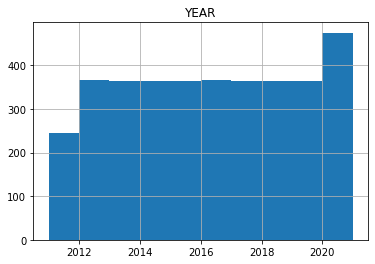

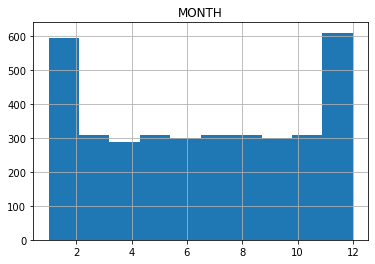

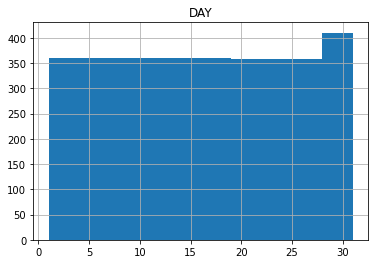

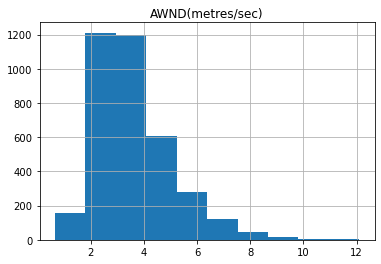

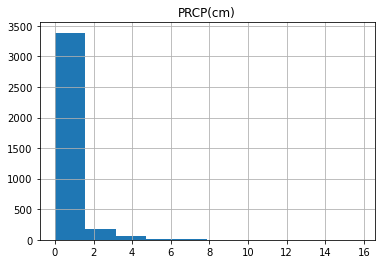

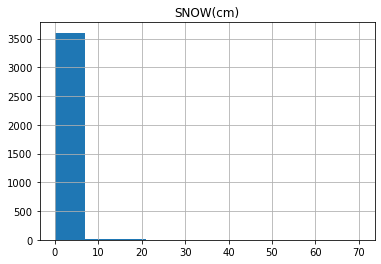

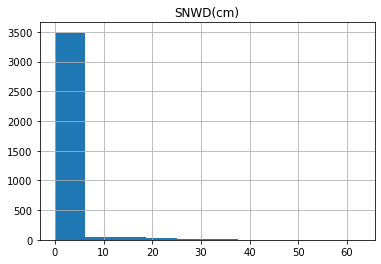

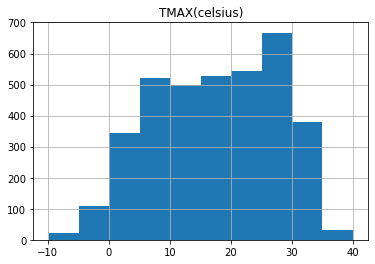

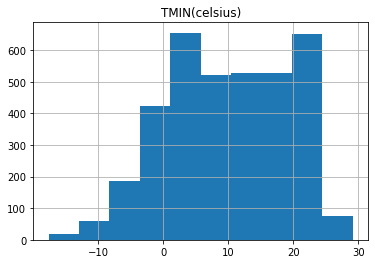

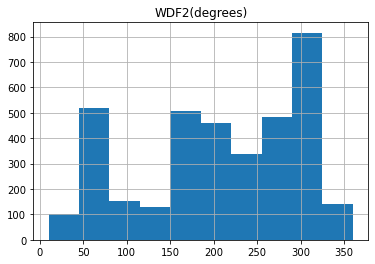

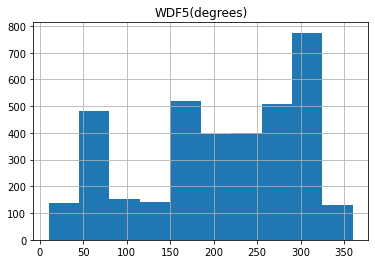

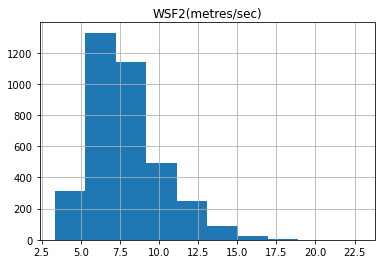

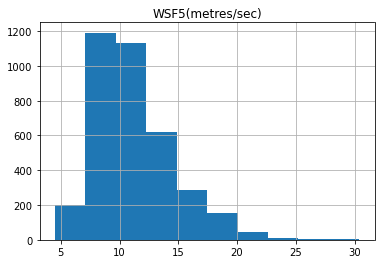

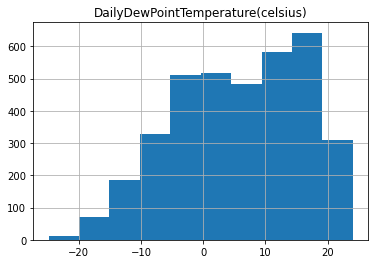

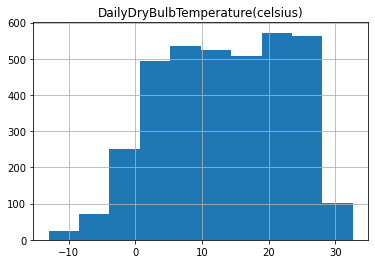

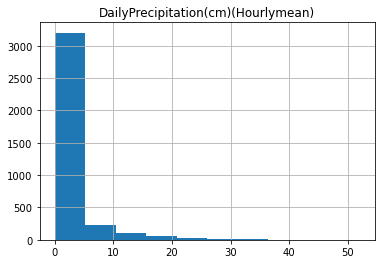

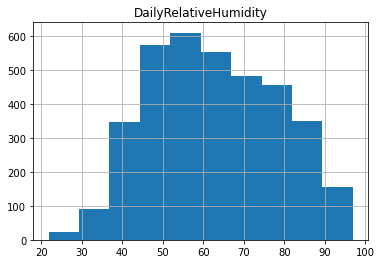

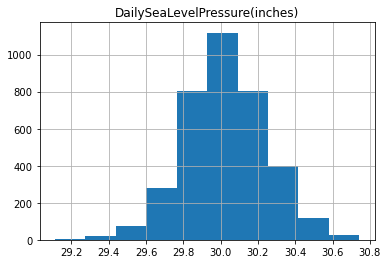

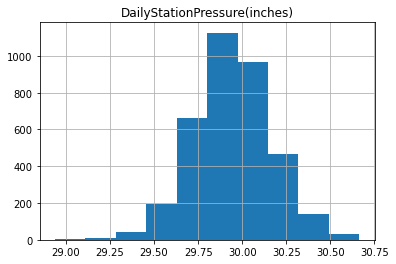

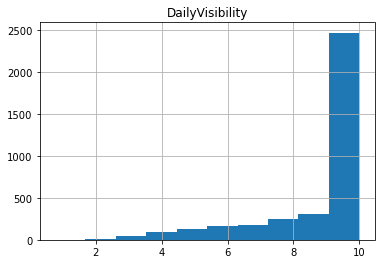

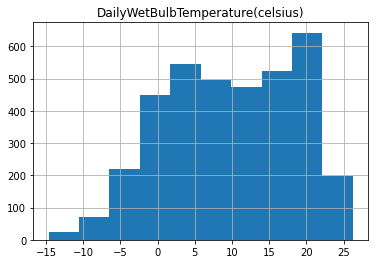

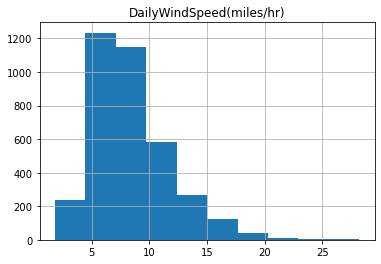

In [ ]:
for col in weather_data.columns:
    weather_data[col].hist()
    plt.title(col)
    plt.show()         # Daily Precipitation seems to be quite skewed, try squaring later

In [ ]:
# See distribution of y label   # to gauge whether RMSE value is good or bad

print(y1_train.describe(), "\n")
print(y2_train.describe(), "\n")
print(y1_val.describe(), "\n")
print(y2_val.describe(), "\n")

count    2548.000000
mean       13.678351
std         9.364515
min       -13.035714
25%         6.009606
50%        14.196980
75%        22.110615
max        32.331349
Name: DailyDryBulbTemperature(celsius), dtype: float64 

count    2548.000000
mean        1.843112
std         4.519067
min         0.000000
25%         0.000000
50%         0.000000
75%         0.994437
max        47.394091
Name: DailyPrecipitation(cm)(Hourlymean), dtype: float64 

count    1093.000000
mean       12.919096
std         9.425607
min       -12.192460
25%         5.381084
50%        12.547281
75%        21.471735
max        32.638889
Name: DailyDryBulbTemperature(celsius), dtype: float64 

count    1093.000000
mean        1.935535
std         5.141502
min         0.000000
25%         0.000000
50%         0.000000
75%         0.963448
max        51.987337
Name: DailyPrecipitation(cm)(Hourlymean), dtype: float64 



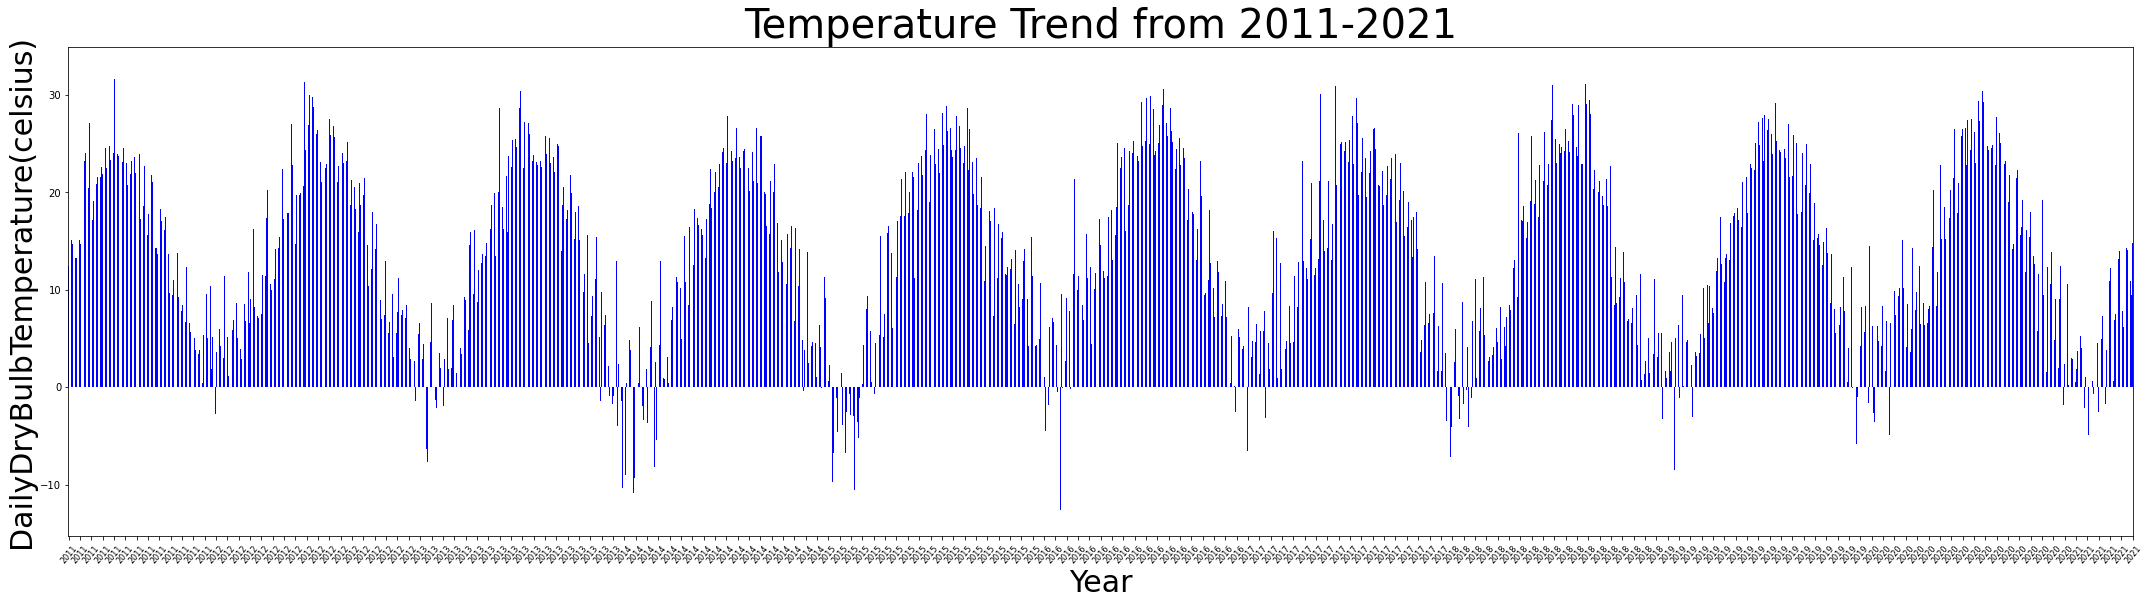

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(37,9))
weather_data["DailyDryBulbTemperature(celsius)"].plot.bar(color='b')
axes.set_ylabel('DailyDryBulbTemperature(celsius)', fontsize = 30)
axes.set_title('Temperature Trend from 2011-2021', fontsize = 40)
axes.set_xlabel('Year', fontsize = 30)

ticks_to_use = np.arange(0,len(weather_data),20) 
labels = []
for i in ticks_to_use:
    labels.append(weather_data.YEAR.iloc[i]) 
    axes.set_xticks(ticks_to_use)
    axes.set_xticklabels(labels, rotation = 50, fontsize = 8)

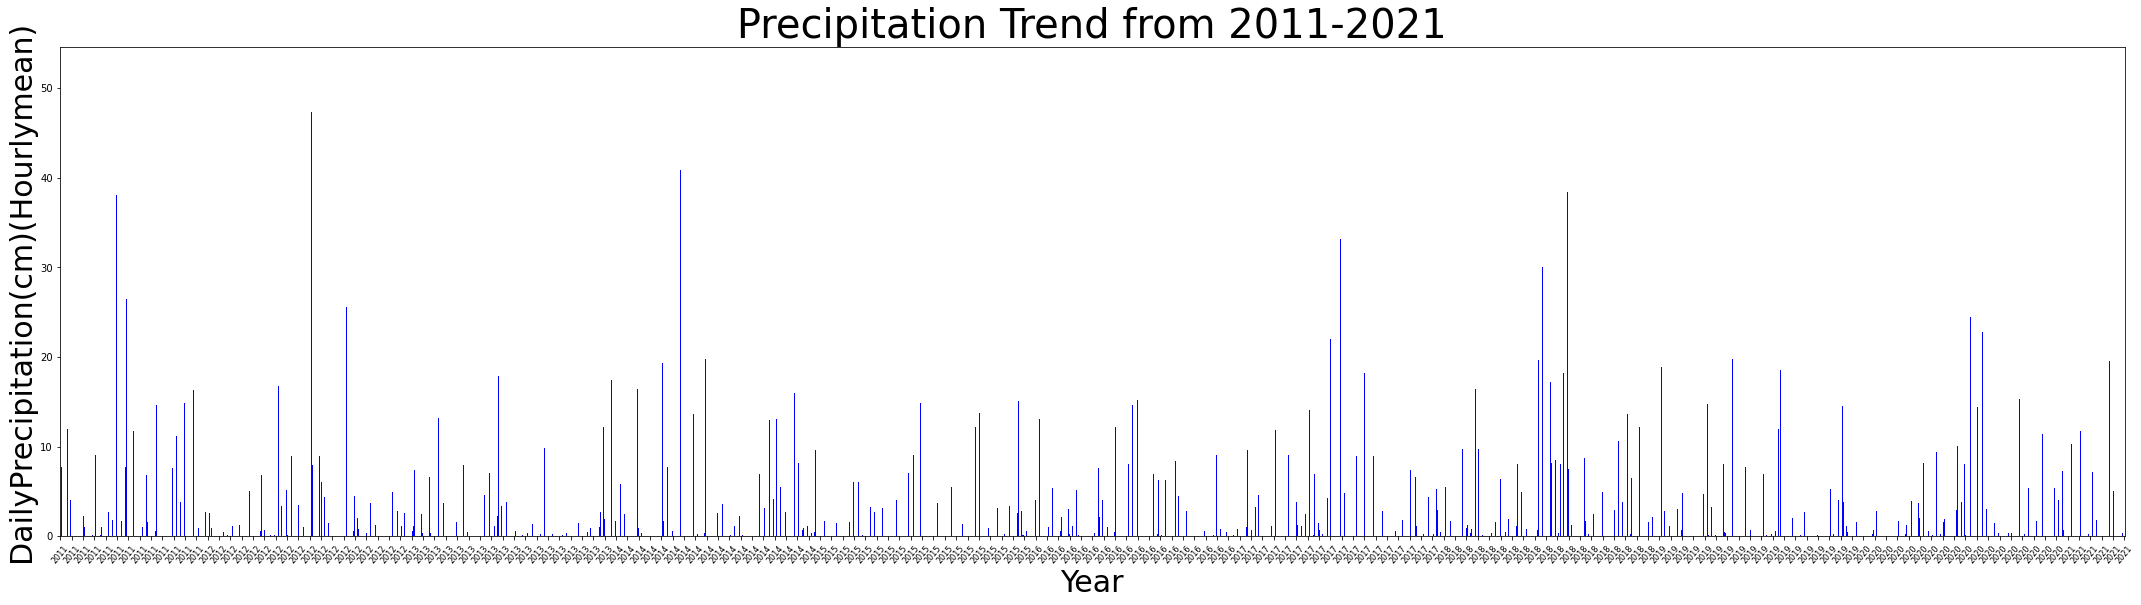

In [ ]:
fig2, axes2 = plt.subplots(1,1, figsize=(37,9))
weather_data["DailyPrecipitation(cm)(Hourlymean)"].plot.bar(color='b')
axes2.set_ylabel('DailyPrecipitation(cm)(Hourlymean)', fontsize = 30)
axes2.set_title('Precipitation Trend from 2011-2021', fontsize = 40)
axes2.set_xlabel('Year', fontsize = 30)

ticks_to_use = np.arange(0,len(weather_data),20) 
labels = []
for i in ticks_to_use:
    labels.append(weather_data.YEAR.iloc[i]) 
    axes2.set_xticks(ticks_to_use)
    axes2.set_xticklabels(labels, rotation = 50, fontsize = 8)

## Train XGBoost Model and Hyperparameter Tuning - Daily Dry Bulb Temp

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
# DailyDryBulbTemperature(celsius)

parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'alpha': [10, 25, 50, 75, 100]
}

start = time.time()

clf = RandomizedSearchCV(xgb.XGBRegressor(eval_metric = 'rmse'), parameters, cv=5, n_jobs=4, scoring = "neg_root_mean_squared_error", n_iter = 200)

clf.fit(x_train, y1_train)

end = time.time()

print("Time in secs:", end-start)

Time in secs: 138.96629571914673


In [ ]:
# best parameters

clf.best_params_

{'subsample': 0.8,
 'n_estimators': 300,
 'max_depth': 2,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 1,
 'colsample_bynode': 0.5,
 'alpha': 10}

In [ ]:
## Create a data frame with the feature importances

imp = pd.DataFrame()
imp["var"] = x_train.columns
imp["imp"] = clf.best_estimator_.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,TMIN(celsius),0.372569
1,TMAX(celsius),0.325390
2,DailyDewPointTemperature(celsius),0.201720
3,DailyWetBulbTemperature(celsius),0.076716
4,SNWD(cm),0.009080
5,DailyVisibility,0.004495
6,MONTH,0.003654
7,DailyRelativeHumidity,0.002734
8,YEAR,0.001283
9,WDF2(degrees),0.000567


In [ ]:
# get predicted probabilities for training and validation set

y1_train_pred = clf.predict(x_train)

# Get the validation probabilities
y1_val_pred = clf.predict(x_val)

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y1_train, y1_train_pred))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y1_val, y1_val_pred))

RMSE for Training Dataset: 0.49519071790330516
RMSE for Validation Dataset 0.5447269900105693


## Train XGBoost Model and Hyperparameter Tuning - Daily Precipitation

In [ ]:
parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'alpha': [10, 25, 50, 75, 100]
}

start = time.time()

clf2 = RandomizedSearchCV(xgb.XGBRegressor(eval_metric = 'rmse'), parameters, cv=5, n_jobs=4, scoring = "neg_root_mean_squared_error", n_iter = 200)

clf2.fit(x_train, y2_train)

end = time.time()

print("Time in secs:", end-start)

Time in secs: 110.64439988136292


In [ ]:
# best parameters

clf2.best_params_

{'subsample': 0.7,
 'n_estimators': 200,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 10,
 'colsample_bytree': 1,
 'colsample_bynode': 0.8,
 'alpha': 10}

In [ ]:
## Create a data frame with the feature importances

imp = pd.DataFrame()
imp["var"] = x_train.columns
imp["imp"] = clf2.best_estimator_.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,PRCP(cm),0.573395
1,DailyVisibility,0.108328
2,DailyWetBulbTemperature(celsius),0.063789
3,DailyDewPointTemperature(celsius),0.052781
4,TMAX(celsius),0.025232
5,AWND(metres/sec),0.023998
6,TMIN(celsius),0.020349
7,WSF2(metres/sec),0.013386
8,DailyWindSpeed(miles/hr),0.012940
9,WSF5(metres/sec),0.012535


In [ ]:
# get predicted probabilities for training and validation set

y2_train_pred = clf2.predict(x_train)

# Get the validation probabilities
y2_val_pred = clf2.predict(x_val)

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y2_train, y2_train_pred))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y2_val, y2_val_pred))

RMSE for Training Dataset: 0.6233984752942842
RMSE for Validation Dataset 1.916166277352824


In [ ]:
# look at correlation between PRCP(cm) and DailyPrecipitation(cm)(Hourlymean) - expected to be highly correlated and should be removed 
# as expected, high correlation - 0.928915. Remove PRCP(cm) from predictors for precipitation predictors, 
# because it will be like cheating by knowing precipitation (even though different means of calculating) and using it to predict precipitation
weather_data.corr()   

,YEAR,MONTH,DAY,AWND(metres/sec),PRCP(cm),SNOW(cm),SNWD(cm),TMAX(celsius),TMIN(celsius),WDF2(degrees),WDF5(degrees),WSF2(metres/sec),WSF5(metres/sec),DailyDewPointTemperature(celsius),DailyDryBulbTemperature(celsius),DailyPrecipitation(cm)(Hourlymean),DailyRelativeHumidity,DailySeaLevelPressure(inches),DailyStationPressure(inches),DailyVisibility,DailyWetBulbTemperature(celsius),DailyWindSpeed(miles/hr)
YEAR,1.000000,-0.128853,-0.008908,0.097999,-0.006138,0.015346,0.014173,-0.087156,-0.085761,0.011349,-0.003400,0.107858,0.087651,-0.093800,-0.072595,-0.028183,-0.080769,0.041959,0.022102,0.056912,-0.085858,0.062040
MONTH,-0.128853,1.000000,0.012410,-0.153744,0.020558,-0.100118,-0.231203,0.264844,0.320321,-0.051704,-0.060830,-0.163909,-0.154341,0.327041,0.306872,0.030466,0.143592,0.052367,0.043188,0.069490,0.319907,-0.151236
DAY,-0.008908,0.012410,1.000000,0.016373,0.025626,-0.033651,-0.032414,0.012402,0.017915,-0.031718,-0.026315,0.013606,0.011808,0.013899,0.016558,0.026280,-0.004098,-0.008565,-0.010193,0.008243,0.015845,0.019299
AWND(metres/sec),0.097999,-0.153744,0.016373,1.000000,0.139737,0.161108,0.080671,-0.453279,-0.447334,0.181908,0.184630,0.867104,0.834956,-0.435662,-0.446835,0.086573,-0.129008,-0.218963,-0.230268,-0.038861,-0.447861,0.974793
PRCP(cm),-0.006138,0.020558,0.025626,0.139737,1.000000,0.199353,0.005580,0.001731,0.036638,-0.158344,-0.147343,0.227724,0.232803,0.178647,0.015573,0.928915,0.479130,-0.235388,-0.261591,-0.596905,0.101541,0.114927
SNOW(cm),0.015346,-0.100118,-0.033651,0.161108,0.199353,1.000000,0.229559,-0.171887,-0.165834,-0.063399,-0.052705,0.128185,0.118688,-0.116861,-0.172770,0.113099,0.100183,-0.041097,-0.050858,-0.303241,-0.156872,0.154747
SNWD(cm),0.014173,-0.231203,-0.032414,0.080671,0.005580,0.229559,1.000000,-0.305204,-0.314507,0.074807,0.083623,0.081104,0.081366,-0.279317,-0.312616,-0.016367,-0.037361,0.022716,0.013245,-0.087587,-0.304847,0.076066
TMAX(celsius),-0.087156,0.264844,0.012402,-0.453279,0.001731,-0.171887,-0.305204,1.000000,0.963039,-0.130119,-0.131993,-0.342742,-0.298588,0.904594,0.987607,0.068782,0.154939,-0.226965,-0.211661,0.075018,0.963670,-0.440576
TMIN(celsius),-0.085761,0.320321,0.017915,-0.447334,0.036638,-0.165834,-0.314507,0.963039,1.000000,-0.190692,-0.195779,-0.368615,-0.330351,0.942094,0.987282,0.098723,0.248718,-0.235006,-0.221501,0.027003,0.982796,-0.439250
WDF2(degrees),0.011349,-0.051704,-0.031718,0.181908,-0.158344,-0.063399,0.074807,-0.130119,-0.190692,1.000000,0.882491,0.250276,0.283125,-0.268616,-0.152236,-0.131784,-0.374421,-0.177016,-0.167033,0.237789,-0.212330,0.188367


## Reduce Predictors Based on Feature Importance to See Whether RMSE Improves

In [1]:
x_train2_temp = train_data.drop(columns = ["DailyDryBulbTemperature(celsius)", "DailyStationPressure(inches)", 
                                          "WSF5(metres/sec)", "DailySeaLevelPressure(inches)", "WDF5(degrees)", 
                                           "WSF2(metres/sec)", "AWND(metres/sec)", "DAY", "DailyWindSpeed(miles/hr)", "PRCP(cm)"])

x_val2_temp = val_data.drop(columns = ["DailyDryBulbTemperature(celsius)", "DailyStationPressure(inches)",
                                       "WSF5(metres/sec)", "DailySeaLevelPressure(inches)", "WDF5(degrees)",
                                       "WSF2(metres/sec)", "AWND(metres/sec)", "DAY", "DailyWindSpeed(miles/hr)", "PRCP(cm)"])

x_train2_prcp = train_data.drop(columns = ["DailyPrecipitation(cm)(Hourlymean)", "DailyWindSpeed(miles/hr)", "AWND(metres/sec)",
                                      "WDF5(degrees)", "DailySeaLevelPressure(inches)", "WDF2(degrees)", "YEAR", "SNOW(cm)",
                                      "MONTH", "SNWD(cm)", "PRCP(cm)"])

x_val2_prcp = val_data.drop(columns = ["DailyPrecipitation(cm)(Hourlymean)", "DailyWindSpeed(miles/hr)", "AWND(metres/sec)",
                                      "WDF5(degrees)", "DailySeaLevelPressure(inches)", "WDF2(degrees)", "YEAR", "SNOW(cm)",
                                      "MONTH", "SNWD(cm)", "PRCP(cm)"])

NameError: ignored

## Train XGBoost Model Again with Hyperparameter Tuning - Dry Bulb Temp

In [ ]:
# DailyDryBulbTemperature(celsius)

parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'alpha': [10, 25, 50, 75, 100]
}

start = time.time()

clf3 = RandomizedSearchCV(xgb.XGBRegressor(eval_metric = 'rmse'), parameters, cv=5, n_jobs=4, scoring = "neg_root_mean_squared_error", n_iter = 200)

clf3.fit(x_train2_temp, y1_train)

end = time.time()

print("Time in secs:", end-start)

Time in secs: 95.0979790687561


In [ ]:
# best parameters

clf3.best_params_

{'subsample': 0.7,
 'n_estimators': 300,
 'max_depth': 3,
 'learning_rate': 0.15,
 'gamma': 0,
 'colsample_bytree': 0.8,
 'colsample_bynode': 0.7,
 'alpha': 10}

In [ ]:
imp = pd.DataFrame()
imp["var"] = x_train2_temp.columns
imp["imp"] = clf3.best_estimator_.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,TMIN(celsius),0.502440
1,TMAX(celsius),0.427725
2,DailyWetBulbTemperature(celsius),0.049489
3,DailyDewPointTemperature(celsius),0.009983
4,MONTH,0.002399
5,YEAR,0.001991
6,DailyVisibility,0.001852
7,SNWD(cm),0.001718
8,DailyRelativeHumidity,0.001105
9,SNOW(cm),0.000576


In [ ]:
# get predicted probabilities for training and validation set

y1_train_pred2 = clf3.predict(x_train2_temp)

# Get the validation probabilities
y1_val_pred2 = clf3.predict(x_val2_temp)

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y1_train, y1_train_pred2))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y1_val, y1_val_pred2))

RMSE for Training Dataset: 0.41664596486243366
RMSE for Validation Dataset 0.5303014955706031


## Train XGBoost Model Again with Hyperparameter Tuning - Precipitation

In [ ]:
parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'alpha': [10, 25, 50, 75, 100]
}

start = time.time()

clf4 = RandomizedSearchCV(xgb.XGBRegressor(eval_metric = 'rmse'), parameters, cv=5, n_jobs=4, scoring = "neg_root_mean_squared_error", n_iter = 200)

clf4.fit(x_train2_prcp, y2_train)

end = time.time()

print("Time in secs:", end-start)

Time in secs: 92.38251948356628


In [ ]:
# best parameters

clf4.best_params_

{'subsample': 0.8,
 'n_estimators': 100,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0,
 'colsample_bytree': 0.8,
 'colsample_bynode': 1,
 'alpha': 25}

In [ ]:
imp = pd.DataFrame()
imp["var"] = x_train2_prcp.columns
imp["imp"] = clf4.best_estimator_.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,DailyVisibility,0.273896
1,DailyRelativeHumidity,0.123472
2,DailyDewPointTemperature(celsius),0.111183
3,WSF5(metres/sec),0.100662
4,DailyWetBulbTemperature(celsius),0.090479
5,DailyStationPressure(inches),0.067008
6,TMIN(celsius),0.061668
7,DailyDryBulbTemperature(celsius),0.054093
8,WSF2(metres/sec),0.045975
9,TMAX(celsius),0.038325


In [ ]:
# get predicted probabilities for training and validation set

y2_train_pred2 = clf4.predict(x_train2_prcp)

# Get the validation probabilities
y2_val_pred2 = clf4.predict(x_val2_prcp)

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y2_train, y2_train_pred2))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y2_val, y2_val_pred2))

RMSE for Training Dataset: 2.352397703203224
RMSE for Validation Dataset 3.6798426915558946


## Feature Engineering 

In [ ]:
x_train3_temp = x_train2_temp
x_val3_temp = x_val2_temp

x_train3_prcp = x_train2_prcp
x_val3_prcp = x_val2_prcp

x_train2_temp.columns

Index(['YEAR', 'MONTH', 'SNOW(cm)', 'SNWD(cm)', 'TMAX(celsius)',
       'TMIN(celsius)', 'WDF2(degrees)', 'DailyDewPointTemperature(celsius)',
       'DailyPrecipitation(cm)(Hourlymean)', 'DailyRelativeHumidity',
       'DailyVisibility', 'DailyWetBulbTemperature(celsius)'],
      dtype='object')

In [ ]:
# variables with skewed distribution include:
# DailyDewPointTemperature

In [ ]:
print(x_train3_temp.columns, "\n")
print(x_train3_prcp.columns)

Index(['YEAR', 'MONTH', 'SNOW(cm)', 'SNWD(cm)', 'TMAX(celsius)',
       'TMIN(celsius)', 'WDF2(degrees)', 'DailyDewPointTemperature(celsius)',
       'DailyPrecipitation(cm)(Hourlymean)', 'DailyRelativeHumidity',
       'DailyVisibility', 'DailyWetBulbTemperature(celsius)'],
      dtype='object') 

Index(['DAY', 'TMAX(celsius)', 'TMIN(celsius)', 'WSF2(metres/sec)',
       'WSF5(metres/sec)', 'DailyDewPointTemperature(celsius)',
       'DailyDryBulbTemperature(celsius)', 'DailyRelativeHumidity',
       'DailyStationPressure(inches)', 'DailyVisibility',
       'DailyWetBulbTemperature(celsius)'],
      dtype='object')


In [ ]:
# DailyDryBulbTemperature(celsius)

# bin SNWD, TMIN (celsius)
# TMIN/DailyDewPointTemperature
# sqrt DailyPrecipitation, Daily Visibility? - doesn't help

x_train3_temp["TMIN_DPTemp_interaction"] = x_train3_temp["TMIN(celsius)"]*x_train3_temp["DailyDewPointTemperature(celsius)"]
x_val3_temp["TMIN_DPTemp_interaction"] = x_val3_temp["TMIN(celsius)"]*x_val3_temp["DailyDewPointTemperature(celsius)"]

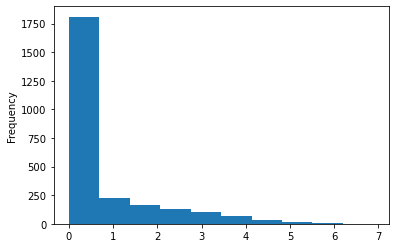

In [ ]:
# not much difference
x_train3_temp["DailyPrecipitation(cm)(Hourlymean)"].map(lambda x: math.sqrt(x)).plot.hist()

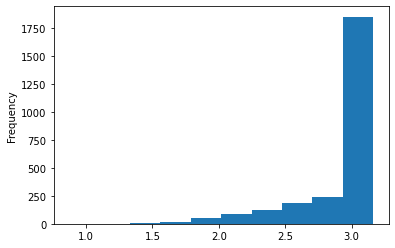

In [ ]:
# not much difference
x_train3_temp["DailyVisibility"].map(lambda x: math.sqrt(x)).plot.hist()

In [ ]:
# look at the quantiles for potential bins for TMIN
for val in range(0, 100, 5):
    print(val / 100, " --> ", x_train["TMIN(celsius)"].quantile(val / 100))

0.0  -->  -17.65
0.05  -->  -4.9
0.1  -->  -1.85
0.15  -->  0.0
0.2  -->  1.65
0.25  -->  2.75
0.3  -->  4.15
0.35  -->  5.55
0.4  -->  6.95
0.45  -->  8.850000000000003
0.5  -->  10.55
0.55  -->  12.2
0.6  -->  13.400000000000011
0.65  -->  15.3
0.7  -->  17.244999999999994
0.75  -->  18.6
0.8  -->  20.0
0.85  -->  21.1
0.9  -->  21.95
0.95  -->  23.35


In [ ]:
# try creating buckets for TMIN

#predict temperature dataset
x_train3_temp["TMIN_low"] = x_train3_temp["TMIN(celsius)"].map(lambda x: 1 if x <= 0.0 else 0)
x_val3_temp["TMIN_low"] = x_val3_temp["TMIN(celsius)"].map(lambda x: 1 if x <= 0.0 else 0)

x_train3_temp["TMIN_mid"] = x_train3_temp["TMIN(celsius)"].map(lambda x: 1 if 0.0 < x <= 10.0 else 0)
x_val3_temp["TMIN_mid"] = x_val3_temp["TMIN(celsius)"].map(lambda x: 1 if 0.0 < x <= 10.0 else 0)

x_train3_temp["TMIN_high"] = x_train3_temp["TMIN(celsius)"].map(lambda x: 1 if x >= 10.0 else 0)
x_val3_temp["TMIN_high"] = x_val3_temp["TMIN(celsius)"].map(lambda x: 1 if x >= 10.0 else 0)

# predict precipitation dataset
x_train3_prcp["TMIN_low"] = x_train3_prcp["TMIN(celsius)"].map(lambda x: 1 if x <= 0.0 else 0)
x_val3_prcp["TMIN_low"] = x_val3_prcp["TMIN(celsius)"].map(lambda x: 1 if x <= 0.0 else 0)

x_train3_prcp["TMIN_mid"] = x_train3_prcp["TMIN(celsius)"].map(lambda x: 1 if 0.0 < x <= 10.0 else 0)
x_val3_prcp["TMIN_mid"] = x_val3_prcp["TMIN(celsius)"].map(lambda x: 1 if 0.0 < x <= 10.0 else 0)

x_train3_prcp["TMIN_high"] = x_train3_prcp["TMIN(celsius)"].map(lambda x: 1 if x >= 10.0 else 0)
x_val3_prcp["TMIN_high"] = x_val3_prcp["TMIN(celsius)"].map(lambda x: 1 if x >= 10.0 else 0)

x_train3_temp = x_train3_temp.drop(columns = ["TMIN(celsius)"])
x_val3_temp = x_val3_temp.drop(columns = ["TMIN(celsius)"])
x_train3_prcp = x_train3_prcp.drop(columns = ["TMIN(celsius)"])
x_val3_prcp = x_val3_prcp.drop(columns = ["TMIN(celsius)"])

In [ ]:
# look at the quantiles for potential bins for SNWD(cm)
for val in range(0, 100, 5):
    print(val / 100, " --> ", x_train["SNWD(cm)"].quantile(val / 100))
    
# not much to bin for

0.0  -->  0.0
0.05  -->  0.0
0.1  -->  0.0
0.15  -->  0.0
0.2  -->  0.0
0.25  -->  0.0
0.3  -->  0.0
0.35  -->  0.0
0.4  -->  0.0
0.45  -->  0.0
0.5  -->  0.0
0.55  -->  0.0
0.6  -->  0.0
0.65  -->  0.0
0.7  -->  0.0
0.75  -->  0.0
0.8  -->  0.0
0.85  -->  0.0
0.9  -->  0.0
0.95  -->  4.0


In [ ]:
# DailyPrecipitation(cm)(Hourlymean)

# Try binning Daily Visibility
# DailyVisibility*DailyRelativeHumidity

for val in range(0, 100, 5):
    print(val / 100, " --> ", x_train["DailyVisibility"].quantile(val / 100))
    

0.0  -->  0.7594285714285716
0.05  -->  4.729457535121329
0.1  -->  5.978524926686217
0.15  -->  6.88139763493026
0.2  -->  7.619861990693452
0.25  -->  8.302390109890109
0.3  -->  8.874726515151515
0.35  -->  9.260571428571428
0.4  -->  9.535411483253588
0.45  -->  9.726376262626264
0.5  -->  9.849899749373433
0.55  -->  9.932997252747253
0.6  -->  9.97409599470374
0.65  -->  9.991428571428571
0.7  -->  9.991428571428571
0.75  -->  9.991428571428571
0.8  -->  9.991428571428571
0.85  -->  9.991428571428571
0.9  -->  9.99157894736842
0.95  -->  9.992363636363637


In [ ]:
#predict temperature dataset
x_train3_temp["DailyVisibility_low"] = x_train3_temp["DailyVisibility"].map(lambda x: 1 if x <= 6.88 else 0)
x_val3_temp["DailyVisibility_low"] = x_val3_temp["DailyVisibility"].map(lambda x: 1 if x <= 6.88 else 0)

x_train3_temp["DailyVisibility_mid"] = x_train3_temp["DailyVisibility"].map(lambda x: 1 if x >= 6.88 else 0)
x_val3_temp["DailyVisibility_mid"] = x_val3_temp["DailyVisibility"].map(lambda x: 1 if x >= 6.88 else 0)

# predict precipitation dataset
x_train3_prcp["DailyVisibility_low"] = x_train3_prcp["DailyVisibility"].map(lambda x: 1 if x <= 6.88 else 0)
x_val3_prcp["DailyVisibility_low"] =x_val3_prcp["DailyVisibility"].map(lambda x: 1 if x <= 6.88 else 0)

x_train3_prcp["DailyVisibility_mid"] = x_train3_prcp["DailyVisibility"].map(lambda x: 1 if x >= 6.88 else 0)
x_val3_prcp["DailyVisibility_mid"] = x_val3_prcp["DailyVisibility"].map(lambda x: 1 if x >= 6.88 else 0)


In [ ]:
# DailyVisibility*DailyRelativeHumidity
x_train3_prcp["Visibility_Humidity_interaction"] = x_train3_prcp["DailyVisibility"]*x_train3_prcp["DailyRelativeHumidity"]
x_val3_prcp["Visibility_Humidity_interaction"] = x_val3_prcp["DailyVisibility"]*x_val3_prcp["DailyRelativeHumidity"]

x_train3_temp = x_train3_temp.drop(columns = ["DailyVisibility"])
x_val3_temp = x_val3_temp.drop(columns = ["DailyVisibility"])
x_train3_prcp = x_train3_prcp.drop(columns = ["DailyVisibility"])
x_val3_prcp = x_val3_prcp.drop(columns = ["DailyVisibility"])

x_train3_prcp = x_train3_prcp.drop(columns = ["DailyRelativeHumidity"])
x_val3_prcp = x_val3_prcp.drop(columns = ["DailyRelativeHumidity"])

## Train XGBoost Model Again with Hyperparameter Tuning - Dry Bulb Temp with Engineered Features 1

In [ ]:
parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'alpha': [10, 25, 50, 75, 100]
}

start = time.time()

clf5 = RandomizedSearchCV(xgb.XGBRegressor(eval_metric = 'rmse'), parameters, cv=5, n_jobs=4, scoring = "neg_root_mean_squared_error", n_iter = 200)

clf5.fit(x_train3_temp, y1_train)

end = time.time()

print("Time in secs:", end-start)

Time in secs: 93.20643472671509


In [ ]:
# best parameters

clf5.best_params_

{'subsample': 0.7,
 'n_estimators': 300,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.7,
 'colsample_bynode': 1,
 'alpha': 10}

In [ ]:
imp = pd.DataFrame()
imp["var"] = x_train3_temp.columns
imp["imp"] = clf5.best_estimator_.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,TMIN_high,0.669594
1,TMIN_low,0.154305
2,TMAX(celsius),0.099678
3,DailyWetBulbTemperature(celsius),0.065780
4,TMIN_DPTemp_interaction,0.006234
5,DailyVisibility_low,0.001140
6,DailyRelativeHumidity,0.000948
7,MONTH,0.000476
8,DailyDewPointTemperature(celsius),0.000450
9,DailyVisibility_mid,0.000391


In [ ]:
# get predicted probabilities for training and validation set

y1_train_pred3 = clf5.predict(x_train3_temp)

# Get the validation probabilities
y1_val_pred3 = clf5.predict(x_val3_temp)

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y1_train, y1_train_pred3))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y1_val, y1_val_pred3))

RMSE for Training Dataset: 0.3395105967407719
RMSE for Validation Dataset 0.4912868005687755


## Train XGBoost Model Again with Hyperparameter Tuning - Precipitation with Engineered Features 1

In [ ]:
parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'alpha': [10, 25, 50, 75, 100]
}

start = time.time()

clf6 = RandomizedSearchCV(xgb.XGBRegressor(eval_metric = 'rmse'), parameters, cv=5, n_jobs=4, scoring = "neg_root_mean_squared_error", n_iter = 200)

clf6.fit(x_train3_prcp, y2_train)

end = time.time()

print("Time in secs:", end-start)

Time in secs: 92.09473586082458


In [ ]:
# best parameters

clf6.best_params_

{'subsample': 0.8,
 'n_estimators': 250,
 'max_depth': 3,
 'learning_rate': 0.15,
 'gamma': 15,
 'colsample_bytree': 0.8,
 'colsample_bynode': 0.8,
 'alpha': 25}

In [ ]:
imp = pd.DataFrame()
imp["var"] = x_train3_prcp.columns
imp["imp"] = clf6.best_estimator_.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,DailyVisibility_mid,0.299169
1,DailyVisibility_low,0.251454
2,DailyDewPointTemperature(celsius),0.067352
3,WSF5(metres/sec),0.062644
4,DailyStationPressure(inches),0.053019
5,WSF2(metres/sec),0.046732
6,DailyDryBulbTemperature(celsius),0.045204
7,DailyWetBulbTemperature(celsius),0.042263
8,TMAX(celsius),0.037858
9,Visibility_Humidity_interaction,0.030755


In [ ]:
# get predicted probabilities for training and validation set

y2_train_pred3 = clf6.predict(x_train3_prcp)

# Get the validation probabilities
y2_val_pred3 = clf6.predict(x_val3_prcp)

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y2_train, y2_train_pred3))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y2_val, y2_val_pred3))

RMSE for Training Dataset: 2.259337340172131
RMSE for Validation Dataset 3.8584595977361054


## Feature Engineering - Add Rolling Average for 1 Week

In [ ]:
y1_train_df = pd.DataFrame(y1_train)
y1_val_df = pd.DataFrame(y1_val) 
y2_train_df = pd.DataFrame(y2_train)
y2_val_df = pd.DataFrame(y2_val) 

y1_train

1400     0.343137
2930    17.887324
1582    28.591270
1107    17.046296
2183    12.271825
          ...    
1122    14.076797
1346    -7.183908
3454    18.204365
3437    22.329060
3582    -0.267094
Name: DailyDryBulbTemperature(celsius), Length: 2548, dtype: float64

In [ ]:
x_train2_temp["DailyDryBulbTemp_SMA(1W)"] = y1_train_df["DailyDryBulbTemperature(celsius)"].rolling(7, min_periods = 1).mean()
x_val2_temp["DailyDryBulbTemp_SMA(1W)"] = y1_val_df["DailyDryBulbTemperature(celsius)"].rolling(7, min_periods = 1).mean()

x_train2_prcp["DailyPrcp_SMA(1W)"] = y2_train_df["DailyPrecipitation(cm)(Hourlymean)"].rolling(7, min_periods = 1).mean()
x_val2_prcp["DailyPrcp_SMA(1W)"] = y2_val_df["DailyPrecipitation(cm)(Hourlymean)"].rolling(7, min_periods = 1).mean()

x_train2_temp

,YEAR,MONTH,SNOW(cm),SNWD(cm),TMAX(celsius),TMIN(celsius),WDF2(degrees),DailyDewPointTemperature(celsius),DailyPrecipitation(cm)(Hourlymean),DailyRelativeHumidity,DailyVisibility,DailyWetBulbTemperature(celsius),TMIN_DPTemp_interaction,TMIN_low,TMIN_mid,TMIN_high,DailyDryBulbTemp_SMA(1W)
1400,2015,3,0.0,26.5,3.60,-2.40,310.0,-7.450980,0.000000,59.147059,8.684706,-2.238562,17.882353,1,0,0,0.343137
2930,2019,5,0.0,0.0,22.80,13.30,135.0,13.873239,0.697255,78.070423,9.198169,15.476190,184.514085,0,0,1,9.115231
1582,2015,8,0.0,0.0,33.05,24.70,255.0,18.432540,0.000000,55.375000,9.527143,21.875000,455.283730,0,0,1,15.607244
1107,2014,5,0.0,0.0,22.25,11.40,50.0,7.592593,0.000000,55.566667,9.825333,12.194444,86.555556,0,0,1,15.967007
2183,2017,4,0.0,0.0,18.60,8.35,165.0,3.134921,0.000000,55.410714,9.991429,8.015873,26.176587,0,1,0,15.227971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2014,5,0.0,0.0,16.70,11.95,60.0,10.016340,0.000000,76.897059,9.713529,11.903595,119.695261,0,0,1,14.767562
1346,2015,1,0.0,3.0,-4.35,-12.40,310.0,-16.034483,0.000000,50.672414,9.681379,-9.157088,198.827586,1,0,0,11.897400
3454,2020,10,0.0,0.0,22.25,14.15,175.0,12.172619,0.000000,68.482143,9.991429,14.751984,172.242560,0,0,1,11.305188
3437,2020,9,0.0,0.0,25.55,20.85,150.0,18.888889,0.304800,81.589744,9.205769,20.135328,393.833333,0,0,1,11.456505


In [ ]:
x_train2_temp.head()

,YEAR,MONTH,SNOW(cm),SNWD(cm),TMAX(celsius),TMIN(celsius),WDF2(degrees),DailyDewPointTemperature(celsius),DailyPrecipitation(cm)(Hourlymean),DailyRelativeHumidity,DailyVisibility,DailyWetBulbTemperature(celsius),TMIN_DPTemp_interaction,TMIN_low,TMIN_mid,TMIN_high,DailyDryBulbTemp_SMA(1W)
1400,2015,3,0.0,26.5,3.60,-2.40,310.0,-7.450980,0.000000,59.147059,8.684706,-2.238562,17.882353,1,0,0,0.343137
2930,2019,5,0.0,0.0,22.80,13.30,135.0,13.873239,0.697255,78.070423,9.198169,15.476190,184.514085,0,0,1,9.115231
1582,2015,8,0.0,0.0,33.05,24.70,255.0,18.432540,0.000000,55.375000,9.527143,21.875000,455.283730,0,0,1,15.607244
1107,2014,5,0.0,0.0,22.25,11.40,50.0,7.592593,0.000000,55.566667,9.825333,12.194444,86.555556,0,0,1,15.967007
2183,2017,4,0.0,0.0,18.60,8.35,165.0,3.134921,0.000000,55.410714,9.991429,8.015873,26.176587,0,1,0,15.227971


## Train XGBoost Model Again with Hyperparameter Tuning - DryBulb Temp with Engineered Features 2

In [ ]:
parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'alpha': [10, 25, 50, 75, 100]
}

start = time.time()

clf7 = RandomizedSearchCV(xgb.XGBRegressor(eval_metric = 'rmse'), parameters, cv=5, n_jobs=4, scoring = "neg_root_mean_squared_error", n_iter = 200)

clf7.fit(x_train2_temp, y1_train)

end = time.time()

print("Time in secs:", end-start)

Time in secs: 96.10234546661377


In [ ]:
imp = pd.DataFrame()
imp["var"] = x_train2_temp.columns
imp["imp"] = clf7.best_estimator_.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,TMIN(celsius),0.453267
1,TMAX(celsius),0.252702
2,DailyWetBulbTemperature(celsius),0.180683
3,TMIN_DPTemp_interaction,0.044786
4,DailyDewPointTemperature(celsius),0.032122
5,TMIN_low,0.013987
6,TMIN_high,0.013584
7,MONTH,0.001782
8,DailyVisibility,0.001614
9,YEAR,0.001483


In [ ]:
# get predicted probabilities for training and validation set

y1_train_pred4 = clf7.predict(x_train2_temp)

# Get the validation probabilities
y1_val_pred4 = clf7.predict(x_val2_temp)

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y1_train, y1_train_pred4))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y1_val, y1_val_pred4))

RMSE for Training Dataset: 0.42937968175690017
RMSE for Validation Dataset 0.5284395023626323


## Train XGBoost Model Again with Hyperparameter Tuning - Precipitation with Engineered Features 2

In [ ]:
parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'alpha': [10, 25, 50, 75, 100]
}

start = time.time()

clf8 = RandomizedSearchCV(xgb.XGBRegressor(eval_metric = 'rmse'), parameters, cv=5, n_jobs=4, scoring = "neg_root_mean_squared_error", n_iter = 200)

clf8.fit(x_train2_prcp, y2_train)

end = time.time()

print("Time in secs:", end-start)

Time in secs: 100.71972608566284


In [ ]:
imp = pd.DataFrame()
imp["var"] = x_train2_prcp.columns
imp["imp"] = clf8.best_estimator_.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,DailyVisibility,0.253283
1,DailyPrcp_SMA(1W),0.156870
2,DailyRelativeHumidity,0.104778
3,DailyDewPointTemperature(celsius),0.095630
4,WSF5(metres/sec),0.075015
5,DailyWetBulbTemperature(celsius),0.064153
6,TMAX(celsius),0.048753
7,WSF2(metres/sec),0.047834
8,DailyStationPressure(inches),0.039847
9,TMIN(celsius),0.033813


In [ ]:
# get predicted probabilities for training and validation set

y2_train_pred4 = clf8.predict(x_train2_prcp)

# Get the validation probabilities
y2_val_pred4 = clf8.predict(x_val2_prcp)

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y2_train, y2_train_pred4))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y2_val, y2_val_pred4))

RMSE for Training Dataset: 1.984782809350188
RMSE for Validation Dataset 3.0630736064485493


## Feature Engineering - Add Lagged Variable for 1 Day and 1 Week

In [ ]:
# add lagged data for 1 day and 1 week to both temp and prcp training and validation dataset

x_train4_temp = pd.concat([y1_train.shift(1), x_train2_temp], axis = 1)
x_train4_temp = x_train4_temp.rename({'DailyDryBulbTemperature(celsius)': 'Temp-1'}, axis=1)

x_train4_temp = pd.concat([y1_train.shift(7), x_train2_temp], axis = 1)
x_train4_temp = x_train4_temp.rename({'DailyDryBulbTemperature(celsius)': 'Temp-7'}, axis=1)

x_train4_temp.head()

,Temp-7,YEAR,MONTH,SNOW(cm),SNWD(cm),TMAX(celsius),TMIN(celsius),WDF2(degrees),DailyDewPointTemperature(celsius),DailyPrecipitation(cm)(Hourlymean),DailyRelativeHumidity,DailyVisibility,DailyWetBulbTemperature(celsius),TMIN_DPTemp_interaction,TMIN_low,TMIN_mid,TMIN_high,DailyDryBulbTemp_SMA(1W)
1400,NaN,2015,3,0.0,26.5,3.60,-2.40,310.0,-7.450980,0.000000,59.147059,8.684706,-2.238562,17.882353,1,0,0,0.343137
2930,NaN,2019,5,0.0,0.0,22.80,13.30,135.0,13.873239,0.697255,78.070423,9.198169,15.476190,184.514085,0,0,1,9.115231
1582,NaN,2015,8,0.0,0.0,33.05,24.70,255.0,18.432540,0.000000,55.375000,9.527143,21.875000,455.283730,0,0,1,15.607244
1107,NaN,2014,5,0.0,0.0,22.25,11.40,50.0,7.592593,0.000000,55.566667,9.825333,12.194444,86.555556,0,0,1,15.967007
2183,NaN,2017,4,0.0,0.0,18.60,8.35,165.0,3.134921,0.000000,55.410714,9.991429,8.015873,26.176587,0,1,0,15.227971


In [ ]:
# Do the same for the other training and validation datasets

x_val4_temp = pd.concat([y1_val.shift(1), x_val2_temp], axis = 1)
x_val4_temp = x_val4_temp.rename({'DailyDryBulbTemperature(celsius)': 'Temp-1'}, axis=1)

x_val4_temp = pd.concat([y1_val.shift(7), x_val2_temp], axis = 1)
x_val4_temp = x_val4_temp.rename({'DailyDryBulbTemperature(celsius)': 'Temp-7'}, axis=1)

x_val4_temp.head()

,Temp-7,YEAR,MONTH,SNOW(cm),SNWD(cm),TMAX(celsius),TMIN(celsius),WDF2(degrees),DailyDewPointTemperature(celsius),DailyPrecipitation(cm)(Hourlymean),DailyRelativeHumidity,DailyVisibility,DailyWetBulbTemperature(celsius),TMIN_DPTemp_interaction,TMIN_low,TMIN_mid,TMIN_high,DailyDryBulbTemp_SMA(1W)
2349,NaN,2017,10,0.0,0.0,27.80,20.55,220.0,17.083333,0.000000,70.750000,9.830714,19.365079,351.062500,0,0,1,23.025794
1793,NaN,2016,3,0.0,0.0,11.70,5.00,295.0,-6.964286,0.000000,34.892857,9.991429,2.787698,-34.821429,0,1,0,15.763889
967,NaN,2013,12,0.0,0.0,5.60,-2.95,315.0,-6.884921,0.000000,52.321429,9.991429,-1.051587,20.310516,1,0,0,11.190476
477,NaN,2012,8,0.0,0.0,28.05,19.75,165.0,14.512671,0.000000,58.280702,9.991579,18.089669,286.625244,0,0,1,14.277360
957,NaN,2013,12,12.3,0.0,1.65,-4.90,65.0,-5.990741,5.597864,79.891667,2.794000,-3.842593,29.354630,1,0,0,10.862629


In [ ]:
x_train4_prcp = pd.concat([y2_train.shift(1), x_train3_prcp], axis = 1)
x_train4_prcp = x_train4_prcp.rename({"DailyPrecipitation(cm)(Hourlymean)": 'Prcp-1'}, axis=1)

x_train4_prcp = pd.concat([y2_train.shift(7), x_train3_prcp], axis = 1)
x_train4_prcp = x_train4_prcp.rename({"DailyPrecipitation(cm)(Hourlymean)": 'Prcp-7'}, axis=1)


x_val4_prcp = pd.concat([y2_val.shift(1), x_val3_prcp], axis = 1)
x_val4_prcp = x_val4_prcp.rename({"DailyPrecipitation(cm)(Hourlymean)": 'Prcp-1'}, axis=1)

x_val4_prcp = pd.concat([y2_val.shift(7), x_val3_prcp], axis = 1)
x_val4_prcp = x_val4_prcp.rename({"DailyPrecipitation(cm)(Hourlymean)": 'Prcp-7'}, axis=1)

x_val4_temp.head()

,Temp-7,YEAR,MONTH,SNOW(cm),SNWD(cm),TMAX(celsius),TMIN(celsius),WDF2(degrees),DailyDewPointTemperature(celsius),DailyPrecipitation(cm)(Hourlymean),DailyRelativeHumidity,DailyVisibility,DailyWetBulbTemperature(celsius),TMIN_DPTemp_interaction,TMIN_low,TMIN_mid,TMIN_high,DailyDryBulbTemp_SMA(1W)
2349,NaN,2017,10,0.0,0.0,27.80,20.55,220.0,17.083333,0.000000,70.750000,9.830714,19.365079,351.062500,0,0,1,23.025794
1793,NaN,2016,3,0.0,0.0,11.70,5.00,295.0,-6.964286,0.000000,34.892857,9.991429,2.787698,-34.821429,0,1,0,15.763889
967,NaN,2013,12,0.0,0.0,5.60,-2.95,315.0,-6.884921,0.000000,52.321429,9.991429,-1.051587,20.310516,1,0,0,11.190476
477,NaN,2012,8,0.0,0.0,28.05,19.75,165.0,14.512671,0.000000,58.280702,9.991579,18.089669,286.625244,0,0,1,14.277360
957,NaN,2013,12,12.3,0.0,1.65,-4.90,65.0,-5.990741,5.597864,79.891667,2.794000,-3.842593,29.354630,1,0,0,10.862629


In [ ]:
# remove first 7 rows

x_train4_temp = x_train4_temp.iloc[7:len(x_train4_temp)]
x_val4_temp = x_val4_temp.iloc[7:len(x_val4_temp)]

x_train4_prcp = x_train4_prcp.iloc[7:len(x_train4_prcp)]
x_val4_prcp = x_val4_prcp.iloc[7:len(x_val4_prcp)]

y1_train2 = y1_train.iloc[7:len(y1_train)]
y1_val2 = y1_val.iloc[7:len(y1_val)]

y2_train2 = y2_train.iloc[7:len(y2_train)]
y2_val2 = y2_val.iloc[7:len(y2_val)]

x_train4_temp.head()

,Temp-7,YEAR,MONTH,SNOW(cm),SNWD(cm),TMAX(celsius),TMIN(celsius),WDF2(degrees),DailyDewPointTemperature(celsius),DailyPrecipitation(cm)(Hourlymean),DailyRelativeHumidity,DailyVisibility,DailyWetBulbTemperature(celsius),TMIN_DPTemp_interaction,TMIN_low,TMIN_mid,TMIN_high,DailyDryBulbTemp_SMA(1W)
972,0.343137,2013,12,0.0,0.0,8.90,4.70,45.0,1.557971,17.407467,75.413043,6.001630,4.239130,7.322464,0,1,0,11.957153
1144,17.887324,2014,6,0.0,0.0,25.55,20.00,10.0,17.064815,1.444314,70.416667,9.454500,19.268519,341.296296,0,0,1,12.665048
2828,28.591270,2019,1,0.0,0.0,3.60,-3.80,340.0,-12.678571,0.000000,43.571429,9.991429,-4.727273,48.178571,1,0,0,8.349572
518,17.046296,2012,10,0.0,0.0,21.65,11.95,275.0,8.353175,0.000000,56.446429,9.991429,12.480159,99.820437,0,0,1,8.403049
818,12.271825,2013,7,0.0,0.0,26.70,21.40,170.0,19.421296,2.496949,80.125000,8.007778,20.817901,415.615741,0,0,1,9.971139


## Train XGBoost Model Again with Hyperparameter Tuning - DryBulb Temp with Engineered Features 3

In [ ]:
parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'alpha': [10, 25, 50, 75, 100]
}

start = time.time()

clf9 = RandomizedSearchCV(xgb.XGBRegressor(eval_metric = 'rmse'), parameters, cv=5, n_jobs=4, scoring = "neg_root_mean_squared_error", n_iter = 200)

clf9.fit(x_train4_temp, y1_train2)

end = time.time()

print("Time in secs:", end-start)

Time in secs: 113.341224193573


In [ ]:
imp = pd.DataFrame()
imp["var"] = x_train4_temp.columns
imp["imp"] = clf9.best_estimator_.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,TMIN_high,0.308897
1,TMIN_low,0.258506
2,TMIN_mid,0.162268
3,TMIN(celsius),0.097317
4,TMAX(celsius),0.053409
5,DailyWetBulbTemperature(celsius),0.042152
6,TMIN_DPTemp_interaction,0.035268
7,DailyDewPointTemperature(celsius),0.034861
8,MONTH,0.005537
9,DailyRelativeHumidity,0.000511


In [ ]:
# get predicted probabilities for training and validation set

y1_train_pred5 = clf9.predict(x_train4_temp)

# Get the validation probabilities
y1_val_pred5 = clf9.predict(x_val4_temp)

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y1_train2, y1_train_pred5))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y1_val2, y1_val_pred5))

RMSE for Training Dataset: 0.40726558425143883
RMSE for Validation Dataset 0.5110868113424918


## Train XGBoost Model Again with Hyperparameter Tuning - Precipitation with Engineered Features 3

In [ ]:
parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'alpha': [10, 25, 50, 75, 100]
}

start = time.time()

clf10 = RandomizedSearchCV(xgb.XGBRegressor(eval_metric = 'rmse'), parameters, cv=5, n_jobs=4, scoring = "neg_root_mean_squared_error", n_iter = 200)

clf10.fit(x_train4_prcp, y2_train2)

end = time.time()

print("Time in secs:", end-start)

Time in secs: 91.40378332138062


In [ ]:
imp = pd.DataFrame()
imp["var"] = x_train4_prcp.columns
imp["imp"] = clf10.best_estimator_.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,DailyVisibility_mid,0.557944
1,DailyVisibility_low,0.249486
2,DailyDewPointTemperature(celsius),0.030535
3,DailyDryBulbTemperature(celsius),0.023309
4,WSF5(metres/sec),0.020651
5,Prcp-7,0.019945
6,DailyStationPressure(inches),0.019515
7,WSF2(metres/sec),0.018802
8,Visibility_Humidity_interaction,0.017963
9,DailyWetBulbTemperature(celsius),0.014804


In [ ]:
# get predicted probabilities for training and validation set

y2_train_pred5 = clf10.predict(x_train4_prcp)

# Get the validation probabilities
y2_val_pred5 = clf10.predict(x_val4_prcp)

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y2_train2, y2_train_pred5))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y2_val2, y2_val_pred5))

RMSE for Training Dataset: 2.6798322072110694
RMSE for Validation Dataset 3.815926051259459
